# PCA

## Purpose:

* PCA
* PC Regression
* PC Regression across all PCs

## Packages and Options

In [1]:
import pandas as pd 
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from scipy.stats import linregress
import scipy

import matplotlib.pyplot as plt

import numpy

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-lm9im_8n because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
sklearn.__version__

'1.0'

In [3]:
scipy.__version__

'1.7.1'

## Read Matrix & Create Index

In [4]:
matrix = pd.read_csv(
    "/home/yraghav/AALS-Epigenomics-Signal-Reproducibility/notebooks/diffbind/2_retrieve_count_matrix/output/matrix.tsv",\
    sep="\t"
    )


matrix = matrix.astype({"START":"int64"})

matrix

,CHR,START,END,CASE.NEUGE540TC4.New,CASE.NEUGE540TC4.Old,CASE.NEUPK546ZLD.New,CASE.NEUPK546ZLD.Old,CASE.NEUEB422WW0.New,CASE.NEUEB422WW0.Old,CTRL.NEUAJ025JC3.New,...,CTRL.NEUWT164JRQ.New,CTRL.NEUWT164JRQ.Old,CASE.NEUBW008RJ5.New,CASE.NEUBW008RJ5.Old,CTRL.NEUCV809LL4.New,CTRL.NEUCV809LL4.Old,CASE.NEUZY975XKL.New,CASE.NEUZY975XKL.Old,CTRL.NEUPW536ZKZ.New,CTRL.NEUPW536ZKZ.Old
1,chr1,10509,10724,0.566101,1.755069,0.929688,3.444439,0.846119,1.880970,0.663835,...,1.801359,1.770877,0.926719,1.063864,0.634439,1.389513,0.803111,1.432734,7.289553,1.766723
2,chr1,41985,42701,0.566101,0.877534,0.929688,1.722219,0.846119,1.880970,0.663835,...,1.801359,0.885438,0.926719,1.063864,0.634439,1.389513,0.803111,1.432734,7.289553,1.766723
3,chr1,55912,56580,0.566101,0.877534,0.929688,1.722219,0.846119,1.880970,4.646848,...,1.801359,1.770877,0.926719,6.383186,3.806633,4.168539,1.606222,2.865468,7.289553,7.066893
4,chr1,629065,631418,149.450693,1065.326665,1320.156291,2070.107815,201.376398,2012.637596,173.261029,...,769.180122,433.864821,461.506117,323.414756,173.201791,1471.494174,442.514248,507.187903,1676.597198,766.757934
5,chr1,631804,633024,8.491517,47.386853,45.554689,41.333268,15.230148,82.762667,13.940543,...,10.808152,23.906837,13.900787,9.574779,20.302041,59.749055,30.518224,20.058279,1188.197145,1676.620459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116844,chrY,56849985,56851320,33.399966,29.836167,48.343752,37.888829,38.075369,31.976485,12.612872,...,126.095102,33.646660,88.965035,69.151181,26.646429,44.464413,30.518224,63.040304,29.158212,45.934807
116845,chrY,56857316,56858254,17.549134,11.407946,30.679688,24.111073,11.845670,16.928727,16.595884,...,32.424455,18.594207,34.288607,26.596608,5.075510,13.895129,12.849779,80.233115,43.737318,24.734127
116846,chrY,56858555,56859253,5.661011,12.285480,26.960938,13.777756,5.076716,28.214546,9.957530,...,48.636682,18.594207,41.702360,31.915930,6.344388,15.284642,12.046667,57.309368,7.289553,10.600340
116847,chrY,56859760,56860646,2.830506,7.897809,25.101563,18.944414,8.461193,13.166788,7.302189,...,28.821738,12.396138,33.361888,23.405015,4.441072,18.063668,12.046667,31.520152,7.289553,12.367063


In [5]:
matrix.index = matrix["CHR"].astype(str) + ":" + matrix["START"].astype(str) + "-" + matrix["END"].astype(str)
matrix

,CHR,START,END,CASE.NEUGE540TC4.New,CASE.NEUGE540TC4.Old,CASE.NEUPK546ZLD.New,CASE.NEUPK546ZLD.Old,CASE.NEUEB422WW0.New,CASE.NEUEB422WW0.Old,CTRL.NEUAJ025JC3.New,...,CTRL.NEUWT164JRQ.New,CTRL.NEUWT164JRQ.Old,CASE.NEUBW008RJ5.New,CASE.NEUBW008RJ5.Old,CTRL.NEUCV809LL4.New,CTRL.NEUCV809LL4.Old,CASE.NEUZY975XKL.New,CASE.NEUZY975XKL.Old,CTRL.NEUPW536ZKZ.New,CTRL.NEUPW536ZKZ.Old
chr1:10509-10724,chr1,10509,10724,0.566101,1.755069,0.929688,3.444439,0.846119,1.880970,0.663835,...,1.801359,1.770877,0.926719,1.063864,0.634439,1.389513,0.803111,1.432734,7.289553,1.766723
chr1:41985-42701,chr1,41985,42701,0.566101,0.877534,0.929688,1.722219,0.846119,1.880970,0.663835,...,1.801359,0.885438,0.926719,1.063864,0.634439,1.389513,0.803111,1.432734,7.289553,1.766723
chr1:55912-56580,chr1,55912,56580,0.566101,0.877534,0.929688,1.722219,0.846119,1.880970,4.646848,...,1.801359,1.770877,0.926719,6.383186,3.806633,4.168539,1.606222,2.865468,7.289553,7.066893
chr1:629065-631418,chr1,629065,631418,149.450693,1065.326665,1320.156291,2070.107815,201.376398,2012.637596,173.261029,...,769.180122,433.864821,461.506117,323.414756,173.201791,1471.494174,442.514248,507.187903,1676.597198,766.757934
chr1:631804-633024,chr1,631804,633024,8.491517,47.386853,45.554689,41.333268,15.230148,82.762667,13.940543,...,10.808152,23.906837,13.900787,9.574779,20.302041,59.749055,30.518224,20.058279,1188.197145,1676.620459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chrY:56849985-56851320,chrY,56849985,56851320,33.399966,29.836167,48.343752,37.888829,38.075369,31.976485,12.612872,...,126.095102,33.646660,88.965035,69.151181,26.646429,44.464413,30.518224,63.040304,29.158212,45.934807
chrY:56857316-56858254,chrY,56857316,56858254,17.549134,11.407946,30.679688,24.111073,11.845670,16.928727,16.595884,...,32.424455,18.594207,34.288607,26.596608,5.075510,13.895129,12.849779,80.233115,43.737318,24.734127
chrY:56858555-56859253,chrY,56858555,56859253,5.661011,12.285480,26.960938,13.777756,5.076716,28.214546,9.957530,...,48.636682,18.594207,41.702360,31.915930,6.344388,15.284642,12.046667,57.309368,7.289553,10.600340
chrY:56859760-56860646,chrY,56859760,56860646,2.830506,7.897809,25.101563,18.944414,8.461193,13.166788,7.302189,...,28.821738,12.396138,33.361888,23.405015,4.441072,18.063668,12.046667,31.520152,7.289553,12.367063


In [6]:
matrix = matrix.iloc[:,3:]
matrix = matrix.T 
matrix

,chr1:10509-10724,chr1:41985-42701,chr1:55912-56580,chr1:629065-631418,chr1:631804-633024,chr1:633353-633549,chr1:633684-634921,chr1:778339-779293,chr1:817372-819211,chr1:826649-828134,...,chrY:22438459-22439251,chrY:26670224-26671770,chrY:56763391-56763659,chrY:56834095-56834672,chrY:56836516-56837230,chrY:56849985-56851320,chrY:56857316-56858254,chrY:56858555-56859253,chrY:56859760-56860646,chrY:56870522-56871228
CASE.NEUGE540TC4.New,0.566101,0.566101,0.566101,149.450693,8.491517,9.057618,529.304539,468.165619,45.854190,305.694600,...,0.566101,0.566101,0.566101,33.966067,59.440617,33.399966,17.549134,5.661011,2.830506,14.718629
CASE.NEUGE540TC4.Old,1.755069,0.877534,0.877534,1065.326665,47.386853,7.020275,3469.770704,517.745249,21.938358,398.400582,...,0.877534,0.877534,0.877534,65.815074,85.120829,29.836167,11.407946,12.285480,7.897809,14.918083
CASE.NEUPK546ZLD.New,0.929688,0.929688,0.929688,1320.156291,45.554689,16.734376,1543.281298,404.414075,29.750001,217.546882,...,0.929688,1.859375,0.929688,38.117189,80.882815,48.343752,30.679688,26.960938,25.101563,27.890626
CASE.NEUPK546ZLD.Old,3.444439,1.722219,1.722219,2070.107815,41.333268,10.333317,4899.714420,323.777262,20.666634,313.443945,...,1.722219,6.888878,1.722219,125.722022,154.999753,37.888829,24.111073,13.777756,18.944414,34.444390
CASE.NEUEB422WW0.New,0.846119,0.846119,0.846119,201.376398,15.230148,6.768955,720.047541,488.210848,42.305966,277.527137,...,0.846119,0.846119,0.846119,32.998653,32.998653,38.075369,11.845670,5.076716,8.461193,16.922386
CASE.NEUEB422WW0.Old,1.880970,1.880970,1.880970,2012.637596,82.762667,16.928727,5876.149392,677.149098,35.738425,402.527519,...,1.880970,1.880970,1.880970,69.595879,63.952970,31.976485,16.928727,28.214546,13.166788,31.976485
CTRL.NEUAJ025JC3.New,0.663835,0.663835,4.646848,173.261029,13.940543,4.646848,531.068287,398.965050,39.830122,284.785369,...,0.663835,2.655341,0.663835,28.544920,35.847109,12.612872,16.595884,9.957530,7.302189,11.285201
CTRL.NEUAJ025JC3.Old,1.081153,1.081153,6.486917,1087.639676,32.434583,7.568069,3706.191659,616.257073,33.515736,343.806577,...,1.081153,1.081153,1.081153,43.246110,59.463402,25.947666,4.324611,6.486917,6.486917,15.136139
CTRL.NEUXC258VTR.New,0.773892,0.773892,2.321675,54.946298,31.729553,19.347288,700.371833,307.234937,23.990637,201.211797,...,0.773892,2.321675,0.773892,30.181770,25.538420,13.156156,13.156156,13.930048,7.738915,6.191132
CTRL.NEUXC258VTR.Old,1.005909,1.005909,3.017728,73.431376,23.135913,19.112276,839.934227,289.701865,32.189096,215.264580,...,1.005909,7.041365,1.005909,40.236370,53.313190,23.135913,17.100457,24.141822,19.112276,21.124094


## Calculate Principal Components

In [7]:
scaled_matrix = pd.DataFrame(StandardScaler().fit_transform(matrix))
scaled_matrix

,0,1,2,3,4,5,6,7,8,9,...,116838,116839,116840,116841,116842,116843,116844,116845,116846,116847
0,-0.764066,-0.708553,-1.021105,-0.910288,-0.262303,-0.267488,-0.922761,0.560690,0.599281,0.549257,...,-0.708553,-0.830634,-0.672094,-0.527808,-0.340683,-0.269574,-0.258152,-0.954857,-1.292935,-0.378176
1,0.339866,-0.409446,-0.904240,0.095409,-0.229722,-0.363411,0.582743,0.989431,-1.375424,2.134274,...,-0.409446,-0.824634,-0.652225,0.237385,0.224158,-0.413548,-0.673805,-0.423281,-0.726390,-0.362633
2,-0.426484,-0.359357,-0.884670,0.375230,-0.231257,0.093949,-0.403610,0.009398,-0.730425,-0.957827,...,-0.359357,-0.805717,-0.648898,-0.428075,0.130942,0.334143,0.630560,0.754342,1.197058,0.648256
3,1.908412,0.401809,-0.587274,1.198731,-0.234793,-0.207426,1.314867,-0.687910,-1.480429,0.681749,...,0.401809,-0.708814,-0.598335,1.676689,1.761158,-0.088227,0.185978,-0.303534,0.508664,1.158959
4,-0.504075,-0.439618,-0.916029,-0.853270,-0.256659,-0.375243,-0.825101,0.734032,0.306308,0.067671,...,-0.439618,-0.825239,-0.654229,-0.551051,-0.922279,-0.080691,-0.644178,-1.001743,-0.663402,-0.206447
5,0.456763,0.554276,-0.527703,1.135624,-0.200090,0.103100,1.814797,2.367878,-0.235967,2.204834,...,0.554276,-0.805301,-0.588207,0.328221,-0.241433,-0.327081,-0.300143,0.854936,-0.137298,0.966647
6,-0.673322,-0.614687,0.510186,-0.884142,-0.257739,-0.475157,-0.921858,-0.037722,0.101880,0.191766,...,-0.614687,-0.790381,-0.665859,-0.658055,-0.859627,-1.109354,-0.322671,-0.610085,-0.792983,-0.645726
7,-0.285851,-0.213886,1.200668,0.119911,-0.242247,-0.337619,0.703790,1.841313,-0.419492,1.200867,...,-0.213886,-0.820711,-0.639234,-0.304849,-0.340182,-0.570640,-1.153224,-0.888582,-0.884134,-0.345641
8,-0.571137,-0.508987,-0.362330,-1.014061,-0.242838,0.216971,-0.835175,-0.830960,-1.205969,-1.237112,...,-0.508987,-0.796810,-0.658837,-0.618729,-1.086368,-1.087406,-0.555481,-0.291313,-0.744155,-1.042683
9,-0.355713,-0.286152,-0.101137,-0.993763,-0.250036,0.205906,-0.763720,-0.982577,-0.529031,-0.996848,...,-0.286152,-0.705876,-0.644035,-0.377160,-0.475457,-0.684233,-0.288520,0.528124,0.527432,0.120972


In [8]:
pca = PCA( random_state=123)

fit = pca.fit(scaled_matrix)

transformed = pd.DataFrame(pca.transform(scaled_matrix), 
                           index = matrix.index, 
                           columns=["component_{}".format(i+1) for i in range(0,48)])


In [9]:
dir(pca)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_fit',
 '_fit_full',
 '_fit_svd_solver',
 '_fit_truncated',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'components_',
 'copy',
 'explained_variance_',
 'explained_variance_ratio_',
 'fit',
 'fit_transform',
 'get_covariance',
 'get_params',
 'get_precision',
 'inverse_transform',
 'iterated_power',
 'mean_',
 'n_components',
 'n_components_',
 'n_features_',
 'n_features_in_',
 'n_samples_',
 'noise_variance_',
 'random

In [10]:
pca.explained_variance_ratio_

array([1.49215412e-01, 1.11908716e-01, 8.06638755e-02, 5.48781814e-02,
       5.01015691e-02, 3.30127449e-02, 3.16272681e-02, 3.02353022e-02,
       2.55947731e-02, 2.38330730e-02, 2.06445037e-02, 1.97943416e-02,
       1.76233709e-02, 1.69268767e-02, 1.61246198e-02, 1.59601225e-02,
       1.48970884e-02, 1.44433302e-02, 1.42783283e-02, 1.39508647e-02,
       1.38153454e-02, 1.34107192e-02, 1.32173262e-02, 1.27210328e-02,
       1.21635440e-02, 1.18173263e-02, 1.15866423e-02, 1.13491866e-02,
       1.09333272e-02, 1.08173861e-02, 1.01784008e-02, 9.24927950e-03,
       9.12532463e-03, 8.89849522e-03, 8.51667523e-03, 7.91992094e-03,
       7.65539158e-03, 7.32726448e-03, 6.85049592e-03, 6.77341001e-03,
       6.34640304e-03, 6.17340069e-03, 5.84993325e-03, 5.72084592e-03,
       5.55719498e-03, 5.24986100e-03, 5.06150397e-03, 8.02434891e-32])

In [11]:
transformed

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,...,component_39,component_40,component_41,component_42,component_43,component_44,component_45,component_46,component_47,component_48
CASE.NEUGE540TC4.New,226.442209,3.577402,37.761300,-35.439924,100.769183,-7.992686,-109.066078,-5.836109,-20.056875,-15.601731,...,-60.058669,-23.906866,-95.337001,-13.479557,-2.488319,-0.095610,-7.691346,-5.310425,-19.330154,1.434842e-13
CASE.NEUGE540TC4.Old,171.826700,47.862432,-79.606992,61.865086,-107.340819,38.675577,58.237156,-85.458136,-36.270378,45.859782,...,-3.589769,9.841376,32.662136,16.781295,18.382325,-8.016285,-3.241378,3.111175,1.977663,-3.061406e-13
CASE.NEUPK546ZLD.New,-94.271739,-70.434423,24.459022,93.645450,68.649221,-11.235703,-58.838989,37.650094,20.996607,-3.971289,...,-11.094611,-12.296932,-18.144526,8.141484,13.766717,10.041108,-4.878732,16.683105,6.885079,-5.924948e-14
CASE.NEUPK546ZLD.Old,-130.365886,-71.370149,41.164709,63.142529,29.888075,-15.381136,-12.700562,11.658002,37.503092,-70.067900,...,7.846179,0.476615,2.210703,0.496915,-0.252357,1.171776,-0.244301,1.427268,-0.808074,-5.093478e-13
CASE.NEUEB422WW0.New,38.433418,-82.622866,-98.980122,-71.089294,50.194115,-12.353102,-60.001284,21.959759,-0.785286,-13.173805,...,11.017259,-44.939555,-21.308512,108.121132,-52.991910,-6.143250,-16.880792,-6.962436,-0.052000,8.483173e-13
CASE.NEUEB422WW0.Old,24.832252,-45.912593,-68.168285,127.507919,18.974150,-6.364994,-66.399970,-57.028648,63.526648,-33.230892,...,-1.737383,0.281804,-2.127041,-3.066112,11.824343,1.573973,4.255000,-3.575575,1.169020,-7.413358e-13
CTRL.NEUAJ025JC3.New,163.006210,32.511438,-12.620160,-160.676664,-88.192796,-1.350303,16.498887,13.014480,-67.530958,-12.602448,...,-47.389193,35.555241,34.469050,89.531509,20.138748,13.932106,-9.029997,38.194146,7.859577,3.343801e-13
CTRL.NEUAJ025JC3.Old,192.292080,14.984412,-88.643876,136.042412,-89.408945,63.353315,109.817135,-87.819098,-42.928724,27.181782,...,10.148104,-21.096704,-40.573584,-32.434642,0.293777,-3.934047,4.191441,-12.420450,-1.782447,-2.484342e-13
CTRL.NEUXC258VTR.New,-102.808079,-96.911970,-76.940490,-64.833564,85.510775,51.838110,-6.268430,-44.125516,-45.510604,16.800054,...,40.183458,142.127653,-25.683703,8.067856,-8.063858,-10.354361,20.532126,-0.859643,-7.270527,1.516959e-12
CTRL.NEUXC258VTR.Old,-188.227859,-106.369738,20.126658,-4.189578,53.021722,27.496250,34.873362,9.893199,-12.483553,-30.030101,...,-4.558615,-43.269671,9.819243,-1.077179,0.826202,7.700999,-6.992238,3.208597,-1.713419,4.943533e-13


## Get "Condition" and "Cohort"

In [12]:
condition = []

for participant_id in transformed.index: 
    condition.append(participant_id.split(".")[0])

In [13]:
new_vs_old = []

for participant_id in transformed.index: 
    new_vs_old.append(participant_id.split(".")[-1])

In [14]:
transformed["Condition"]=condition
transformed["Cohort"] = new_vs_old


transformed

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,...,component_41,component_42,component_43,component_44,component_45,component_46,component_47,component_48,Condition,New vs Old
CASE.NEUGE540TC4.New,226.442209,3.577402,37.761300,-35.439924,100.769183,-7.992686,-109.066078,-5.836109,-20.056875,-15.601731,...,-95.337001,-13.479557,-2.488319,-0.095610,-7.691346,-5.310425,-19.330154,1.434842e-13,CASE,New
CASE.NEUGE540TC4.Old,171.826700,47.862432,-79.606992,61.865086,-107.340819,38.675577,58.237156,-85.458136,-36.270378,45.859782,...,32.662136,16.781295,18.382325,-8.016285,-3.241378,3.111175,1.977663,-3.061406e-13,CASE,Old
CASE.NEUPK546ZLD.New,-94.271739,-70.434423,24.459022,93.645450,68.649221,-11.235703,-58.838989,37.650094,20.996607,-3.971289,...,-18.144526,8.141484,13.766717,10.041108,-4.878732,16.683105,6.885079,-5.924948e-14,CASE,New
CASE.NEUPK546ZLD.Old,-130.365886,-71.370149,41.164709,63.142529,29.888075,-15.381136,-12.700562,11.658002,37.503092,-70.067900,...,2.210703,0.496915,-0.252357,1.171776,-0.244301,1.427268,-0.808074,-5.093478e-13,CASE,Old
CASE.NEUEB422WW0.New,38.433418,-82.622866,-98.980122,-71.089294,50.194115,-12.353102,-60.001284,21.959759,-0.785286,-13.173805,...,-21.308512,108.121132,-52.991910,-6.143250,-16.880792,-6.962436,-0.052000,8.483173e-13,CASE,New
CASE.NEUEB422WW0.Old,24.832252,-45.912593,-68.168285,127.507919,18.974150,-6.364994,-66.399970,-57.028648,63.526648,-33.230892,...,-2.127041,-3.066112,11.824343,1.573973,4.255000,-3.575575,1.169020,-7.413358e-13,CASE,Old
CTRL.NEUAJ025JC3.New,163.006210,32.511438,-12.620160,-160.676664,-88.192796,-1.350303,16.498887,13.014480,-67.530958,-12.602448,...,34.469050,89.531509,20.138748,13.932106,-9.029997,38.194146,7.859577,3.343801e-13,CTRL,New
CTRL.NEUAJ025JC3.Old,192.292080,14.984412,-88.643876,136.042412,-89.408945,63.353315,109.817135,-87.819098,-42.928724,27.181782,...,-40.573584,-32.434642,0.293777,-3.934047,4.191441,-12.420450,-1.782447,-2.484342e-13,CTRL,Old
CTRL.NEUXC258VTR.New,-102.808079,-96.911970,-76.940490,-64.833564,85.510775,51.838110,-6.268430,-44.125516,-45.510604,16.800054,...,-25.683703,8.067856,-8.063858,-10.354361,20.532126,-0.859643,-7.270527,1.516959e-12,CTRL,New
CTRL.NEUXC258VTR.Old,-188.227859,-106.369738,20.126658,-4.189578,53.021722,27.496250,34.873362,9.893199,-12.483553,-30.030101,...,9.819243,-1.077179,0.826202,7.700999,-6.992238,3.208597,-1.713419,4.943533e-13,CTRL,Old


## PC1 vs PC2 Plot

48
48


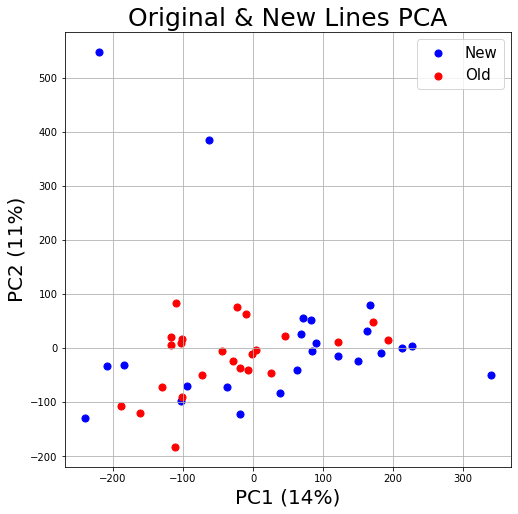

In [15]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1 (14%)', fontsize = 20)
ax.set_ylabel('PC2 (11%)', fontsize = 20)
ax.set_title('Original & New Lines PCA', fontsize = 25)

targets = ['New', 'Old']
colors = ['b', 'r']

for target, color in zip(targets,colors):
    indicesToKeep = transformed['New vs Old'] == target
    print(len(indicesToKeep))
    ax.scatter(transformed.loc[indicesToKeep, 'component_1']
               , transformed.loc[indicesToKeep, 'component_2']
               , c = color
               , s = 50)

ax.legend(targets, prop={"size":15})
ax.grid()

## Plot PC Regression

In [66]:
new = []
old = []

tmp_component = transformed["component_46"].to_list()

for i in range(0, len(tmp_component), 2): 
    old.append(tmp_component[i+1])
    new.append(tmp_component[i])
    

In [67]:
tmp = linregress(old, new)
tmp

LinregressResult(slope=-4.571758999319521, intercept=1.1594499218657257, rvalue=-0.761209512222282, pvalue=1.5633988495100356e-05, stderr=0.8303894137191649, intercept_stderr=4.784287620048818)

In [68]:
pred = [(tmp.intercept+ (tmp.slope * i)) for i in old ]

In [69]:
pred

[-13.064093233857642,
 -5.365674908540906,
 17.50611598927777,
 57.94275491857408,
 -13.509484096851638,
 -4.044830520255347,
 -29.647034869863003,
 54.86445388940191,
 -24.525851234225758,
 -19.53855802197896,
 4.04359866446899,
 -9.109400725896908,
 -22.00499295887463,
 43.58401536568429,
 -12.418669436467558,
 7.1631669958093065,
 -24.695040885467613,
 -9.363106934907048,
 -18.269460110002974,
 38.47634374668548,
 -18.873142994775726,
 34.664709632627435,
 -25.426900073576977,
 -16.179700870195898]

Text(0.5, 1.0, 'PC46 Old vs New')

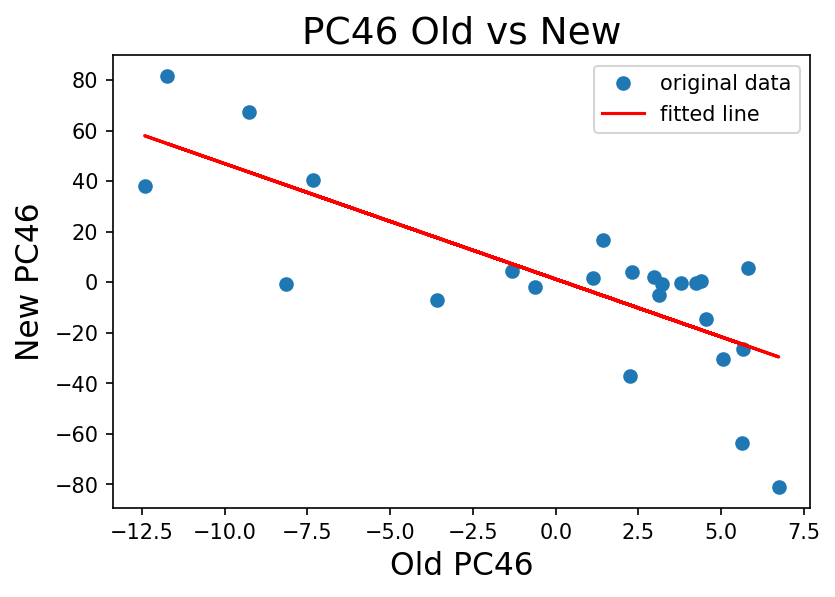

In [71]:
plt.figure(dpi = 150)
plt.plot(old, new, 'o', label="original data")
plt.plot(old, 
         pred, 
         'r', 
         label = 'fitted line' )

plt.xlabel('Old PC46', fontsize = 15)
plt.ylabel('New PC46', fontsize = 15)

plt.legend()

plt.title("PC46 Old vs New", fontsize=18)

## R-Squared Value per PC

In [40]:
transformed = transformed.iloc[:,:-2]

In [47]:
regression_pcs = {}
counter = 1

for component in transformed.columns: 
    
    new = []
    old = []

    tmp_component = transformed[component].to_list()

    for i in range(0, len(tmp_component), 2): 
        old.append(tmp_component[i+1])
        new.append(tmp_component[i])

    regression_pcs["PC{}".format(counter)] = linregress(old, new)
    
    counter +=1
    

In [48]:
regression_pcs

{'PC1': LinregressResult(slope=0.7924639773965781, intercept=66.46129440632612, rvalue=0.503409759919458, pvalue=0.012150904708691145, stderr=0.28999087389145944, intercept_stderr=29.87072769254153),
 'PC2': LinregressResult(slope=1.1824572607156425, intercept=37.59002804251472, rvalue=0.5027233785390051, pvalue=0.012288166255948777, stderr=0.43349448081331804, intercept_stderr=28.124941870029947),
 'PC3': LinregressResult(slope=0.24777127674027294, intercept=-22.070962477314104, rvalue=0.17067230285616203, pvalue=0.42524132964541916, stderr=0.3049701451929949, intercept_stderr=23.970085503224613),
 'PC4': LinregressResult(slope=-0.29486177878866565, intercept=-23.66919766799269, rvalue=-0.19559369788253816, pvalue=0.35969442861305445, stderr=0.3151968176284813, intercept_stderr=20.805300237909172),
 'PC5': LinregressResult(slope=0.2479852438268327, intercept=52.23006076757344, rvalue=0.19765445695788028, pvalue=0.35455387136990746, stderr=0.2622130950491269, intercept_stderr=18.428215

In [51]:
r2_values = []

for component in regression_pcs: 
    r2_values.append(regression_pcs[component].rvalue**2)

In [52]:
r2_values

[0.2534213863821664,
 0.2527307953296718,
 0.029129034962225492,
 0.038256894651365614,
 0.03906728435531455,
 0.0014876032781890962,
 0.027000199608476074,
 0.11039954623958333,
 0.0797172260032909,
 0.0023544905065514955,
 0.04497812109791205,
 0.19010868633855393,
 8.126290282478966e-05,
 0.032865363046681965,
 0.03461058749958383,
 0.09073526973059047,
 0.27463143321673184,
 0.02799377147500923,
 0.07943281768824448,
 0.0575827886300129,
 0.0653182314261829,
 0.027951296631336425,
 0.34053603222693984,
 0.035664329462793784,
 0.0009842305863241357,
 0.07150071952466235,
 0.03589815578511233,
 0.14818223842456782,
 0.04162184676078917,
 0.0007420331743059243,
 0.23703494793310412,
 0.009439745045810728,
 0.004904498387857134,
 0.3897013401865721,
 0.0024039518812839673,
 0.21459010577897888,
 0.16713228286108775,
 0.2690975715102565,
 0.1644157726148879,
 0.49848044894549054,
 0.5139650447720987,
 0.3879332768547211,
 0.5101991139717369,
 0.37865582432819817,
 0.29457281692912857,
 

Text(0, 0.5, 'R^2 Value')

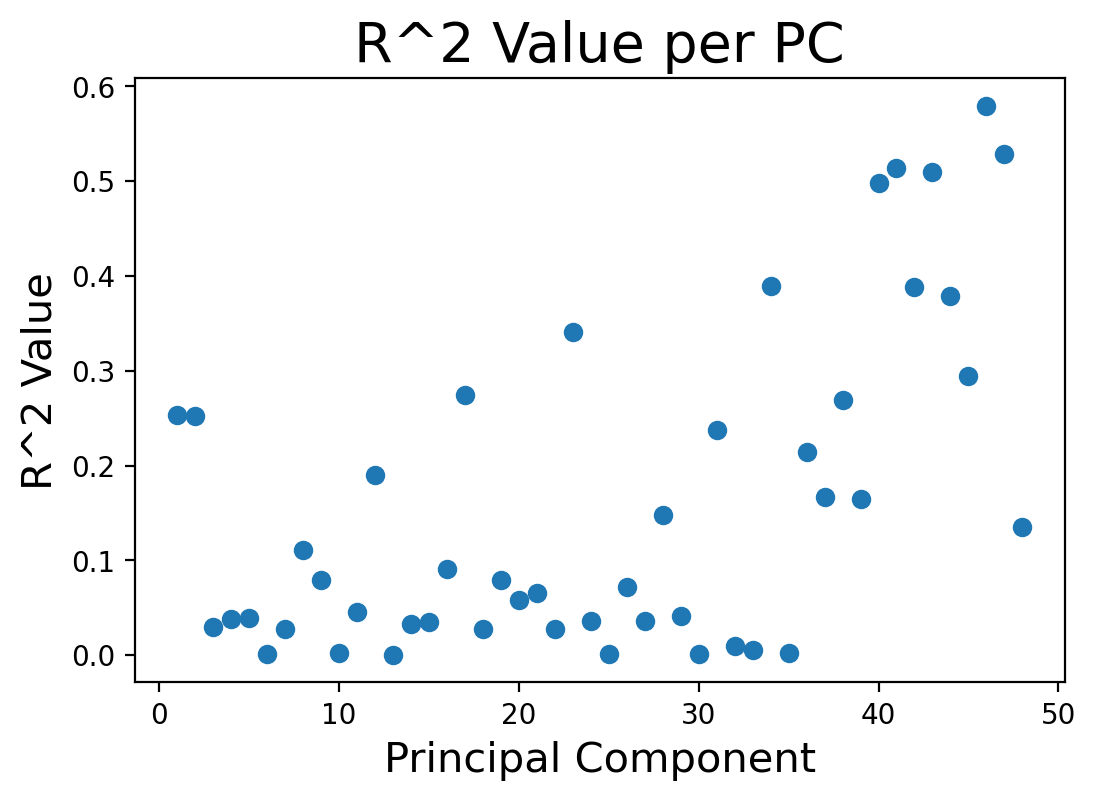

In [65]:
plt.figure(dpi = 200)
plt.title("R^2 Value per PC", fontsize=20)
plt.scatter(range(1,49), r2_values)

plt.xlabel("Principal Component", fontsize=15)
plt.ylabel("R^2 Value", fontsize=15)